In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CustomRegression import PimLinearRegression

In [2]:
df = pd.read_csv("../test/height_weight.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df["Height"] = round(df["Height"], 2)
df["Weight"] = round(df["Weight"], 2)

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.85,241.89
1,Male,68.78,162.31
2,Male,74.11,212.74
3,Male,71.73,220.04
4,Male,69.88,206.35


In [5]:
df.drop("Gender", axis=1, inplace=True)
df.head()

,Height,Weight
0,73.85,241.89
1,68.78,162.31
2,74.11,212.74
3,71.73,220.04
4,69.88,206.35


In [6]:
heights = np.array(df["Height"])
weights = np.array(df["Weight"])
print(heights)
print(weights)

[73.85 68.78 74.11 ... 63.87 69.03 61.94]
[241.89 162.31 212.74 ... 128.48 163.85 113.65]


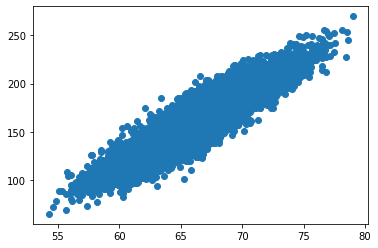

In [7]:
plt.scatter(heights, weights)

In [8]:
lr_model = PimLinearRegression(up_rate=10, dp=0.1, degree=1)

In [9]:
lr_model.fit(heights, weights)

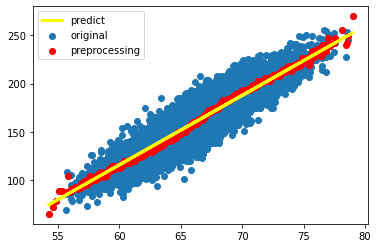

In [10]:
lr_model.evaluation_graph(heights, weights)

In [11]:
pred = lr_model.predict([55, 60, 65, 70])
print(pred)

[79.43099999999998, 115.55599999999998, 151.68099999999998, 187.80599999999998]


In [12]:
lr_model.info()

y = 7.225x + (-317.944)


(7.225, -317.944)

In [13]:
df = pd.read_csv("./diabetes_dataset__2019.csv ")
df.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


In [14]:
df.describe()

,BMI,Sleep,SoundSleep,Pregancies
count,948.000000,952.000000,952.000000,910.000000
mean,25.763713,6.949580,5.495798,0.386813
std,5.402595,1.273189,1.865618,0.909455
min,15.000000,4.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000
max,45.000000,11.000000,11.000000,4.000000


In [15]:
df["BMI"] = df["BMI"].fillna(26)
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  0
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [16]:
bmis = np.array(df["BMI"].tolist())
sleeps = np.array(df["Sleep"].tolist())
print(bmis)
print(sleeps)

[39. 28. 24. 23. 27. 21. 24. 20. 23. 20. 20. 26. 21. 22. 15. 34. 22. 24.
 24. 22. 30. 24. 24. 20. 24. 21. 20. 27. 29. 18. 32. 21. 26. 31. 26. 21.
 28. 24. 27. 21. 27. 24. 36. 21. 22. 21. 38. 40. 35. 24. 18. 23. 19. 26.
 30. 27. 18. 29. 19. 21. 24. 31. 22. 19. 27. 26. 21. 26. 23. 26. 18. 19.
 24. 33. 31. 23. 23. 20. 28. 26. 24. 24. 17. 28. 23. 24. 19. 15. 22. 23.
 18. 21. 21. 21. 22. 25. 20. 24. 21. 26. 27. 26. 24. 21. 22. 23. 28. 32.
 33. 24. 28. 30. 30. 26. 27. 22. 26. 18. 22. 21. 26. 26. 26. 31. 33. 30.
 23. 29. 17. 24. 26. 27. 21. 26. 20. 22. 21. 26. 21. 21. 24. 24. 26. 32.
 34. 30. 42. 33. 23. 27. 25. 28. 28. 33. 33. 28. 28. 36. 33. 28. 28. 33.
 38. 33. 38. 36. 33. 33. 38. 36. 33. 38. 38. 33. 33. 38. 32. 33. 22. 24.
 23. 27. 24. 18. 20. 19. 28. 19. 25. 25. 24. 27. 19. 25. 28. 25. 24. 21.
 23. 28. 20. 18. 25. 28. 27. 20. 20. 17. 26. 21. 29. 29. 24. 23. 23. 29.
 19. 23. 17. 23. 24. 25. 35. 33. 34. 36. 30. 28. 35. 24. 22. 30. 22. 22.
 27. 23. 27. 29. 39. 28. 24. 23. 27. 21. 24. 20. 23

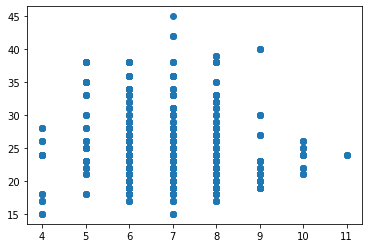

In [17]:
plt.scatter(sleeps, bmis)

In [20]:
lr_model = PimLinearRegression(up_rate=10, dp=2, degree=1)

In [21]:
lr_model.fit(sleeps, bmis)

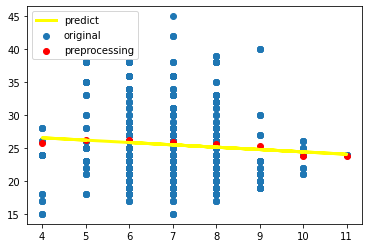

In [22]:
lr_model.evaluation_graph(sleeps, bmis)

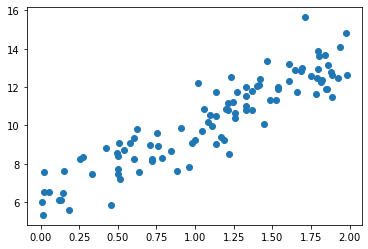

In [23]:
np.random.seed(49)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X+np.random.randn(100, 1)

X = np.ravel(X, order="C")
y = np.ravel(y, order="C")

plt.scatter(X, y)

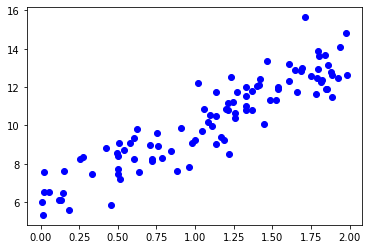

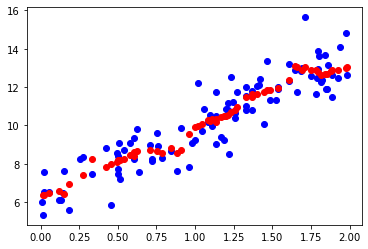

In [24]:
plt.figure(0)
plt.scatter(X, y, color="blue")

plt.figure(1)
plt.scatter(X, y, color="blue")
data = list(zip(X, y))
data = pd.DataFrame(data, columns=["X", "y"])

def duplicate(x):
    duplicate_data = data[(data["X"] > (x - 0.1)) & (data["X"] < (x + 0.1))]["y"]
    return sum(duplicate_data) / len(duplicate_data)

data["y"] = data["X"].apply(lambda x: duplicate(x))
data = data.drop_duplicates(["y"], keep="first")
data = data.reset_index(drop=True)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], color="red")

In [25]:
lr_model = PimLinearRegression(degree=1)

In [26]:
lr_model.fit(X, y)

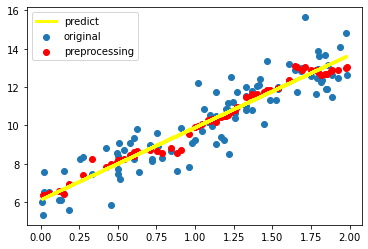

In [27]:
lr_model.evaluation_graph(X, y)

In [28]:
lr_model.info()

y = 3.772x + (6.117)


(3.772, 6.117)

### sklearn 에서 제공하는 LinearRegression 과 성능 비교

##### PimLinearRegression
- RMSE: 0.937166011921593

In [29]:
pred = lr_model.predict(X)
pim_rmse = 0
for p, r in zip(pred, y):
    pim_rmse += (p-r) ** 2
pim_rmse = np.sqrt(pim_rmse / len(X))
pim_rmse

0.937166011921593

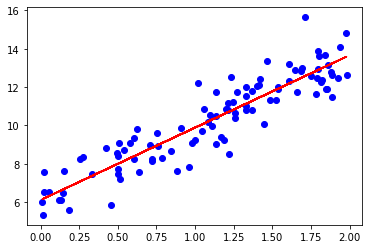

In [30]:
plt.scatter(X, y, color="blue")
plt.plot(X, pred, color="red")

##### Sklearn LinearRegression
- RMSE: 0.9361250071361898

In [31]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X.reshape(-1, 1), y.reshape(-1, 1))
pred = lr_model.predict(X.reshape(-1, 1)).reshape(len(y), )

sk_rmse = 0
for p, r in zip(pred, y):
    sk_rmse += (p-r) ** 2
    
sk_rmse = np.sqrt(sk_rmse / len(X))
sk_rmse

0.9361250071361898

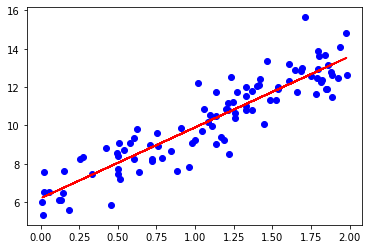

In [32]:
plt.scatter(X, y, color='blue')
plt.plot(X, pred, color="red")
plt.show()

In [33]:
print(pim_rmse - sk_rmse)

0.0010410047854031435


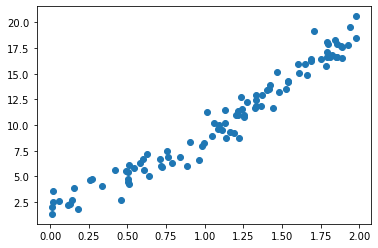

In [34]:
pimDegree2 = PimLinearRegression(up_rate=5, dp=0.1, scale=4, degree=2)

np.random.seed(49)
X = np.round(2 * np.random.rand(100, 1), 3)
y = np.round((2 * X**2) + (5*X) + 2 + np.random.randn(100, 1), 4)

X = np.ravel(X, order="C")
y = np.ravel(y, order="C")

plt.scatter(X, y)

In [36]:
pimDegree2.fit(X, y)

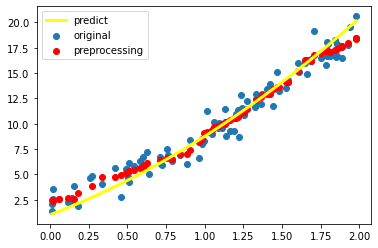

In [37]:
pimDegree2.evaluation_graph(X, y)